# Assignment 2 - Classification Model building and tuning

Mikayel Karapetyan


The purpose of this assignment is to train, validate, and tune multiple classifiers that can predict, given a set of observations about a person, which income bracket the person fall into.

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas.tools.plotting import scatter_matrix

import numpy as np
from numpy import mean  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import string
import scipy
import time 
import scipy.stats as stats
import operator

from sklearn import tree
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold



In [ ]:
# installing xgboost on Anaconda Windows was tricky, so the guidelines from the following weppage powered by IBM were used
# instructions are from https://www.ibm.com/developerworks/community/blogs/jfp/entry/Installing_XGBoost_For_Anaconda_on_Windows?lang=en
#to install xgboost on Windows Anaconda 

In [3]:
import os

In [4]:
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.3.0-posix-seh-rt_v5-rev0\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [5]:
import xgboost as xgb


In [6]:
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
path = 'C:\\Mikayel\\MK_Organizer\\2018_DataScience_Romanko\\Assignment2_WinterTerm\\2'
os.chdir(path)

### Read the input data into dataframe

In [8]:
# We will now read training and test data sets into corresponding dataframes
df_train = pd.read_csv('income-training.csv')
df_test = pd.read_csv('income-testing.csv')

Let's explore the data

##### Training data top looks like

In [9]:
df_train.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,42,State-gov,179151,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<50K
1,28,Private,68021,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,<50K
2,24,Private,233499,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,50-100K
3,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,<50K
4,55,Self-emp-not-inc,105582,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,2228,0,50,United-States,<50K


In [10]:
#df_train.info()

In [11]:
#Some sample statistics on training data

In [12]:
df_train.describe()

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek
count,24421.000000,2.442100e+04,24421.000000,24421.000000,24421.00000,24421.000000
mean,38.635273,1.908781e+05,10.100078,1073.734900,90.72581,40.495352
std,13.658678,1.066108e+05,2.579953,7372.250508,410.42682,12.363606
min,17.000000,1.349200e+04,1.000000,0.000000,0.00000,1.000000
25%,28.000000,1.182590e+05,9.000000,0.000000,0.00000,40.000000
50%,37.000000,1.783830e+05,10.000000,0.000000,0.00000,40.000000
75%,48.000000,2.394090e+05,13.000000,0.000000,0.00000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.00000,99.000000


##### Testing data top looks like

In [13]:
df_test.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,57,Self-emp-not-inc,152030,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,United-States,50-100K
1,35,Private,341643,Bachelors,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,United-States,<50K
2,26,Private,40915,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<50K
3,27,Federal-gov,257124,Bachelors,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,United-States,<50K
4,21,Private,256278,HS-grad,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,El-Salvador,<50K


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12211 entries, 0 to 12210
Data columns (total 15 columns):
Age              12211 non-null int64
WorkClass        11523 non-null object
FinalWeight      12211 non-null int64
Education        12211 non-null object
EducationLvl     12211 non-null int64
MaritalStatus    12211 non-null object
Occupation       11521 non-null object
Relationship     12211 non-null object
Race             12211 non-null object
Sex              12211 non-null object
CapitalGain      12211 non-null int64
CapitalLoss      12211 non-null int64
HoursPerWeek     12211 non-null int64
NativeCountry    11986 non-null object
IncomeBracket    12211 non-null object
dtypes: int64(6), object(9)
memory usage: 1.4+ MB


In [15]:
#Some sample statistics on test data

In [16]:
df_test.describe()

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek
count,12211.000000,1.221100e+04,12211.000000,12211.000000,12211.000000,12211.000000
mean,38.856031,1.873615e+05,10.110228,1203.788961,88.256162,40.497994
std,13.705457,1.046019e+05,2.533795,8057.146114,404.810323,12.283195
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.162960e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.769000e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.345370e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Brief introduction of first three sections of the assignment that are implemented below

#### Data Cleaning
While the data is made ready for analysis, several values are missing, and majority of the
features are categorical. For the data cleaning step, handle missing values however you see
fit and justify your approach. Provide some insight on why you think the values are missing
and how your approach might impact the overall analysis. Suggestions include filling the
missing values with a certain value (e.g. mean for continuous data, mode for categorical
data) and completely removing the features with missing values. Secondly, convert
categorical data into numerical data by encoding and explain why you used this particular
encoding method.

#### Exploratory Analysis
a.Present 3 graphical figures that represent trends in the data. How could these trends be
used to help with the task of classification of income bracket? All graphs should be
readable and have all axes appropriately labelled.
b. Visualize the order of feature importance. Some possible methods include correlation
plot, or a similar method. Given the data, which of the original attributes in the data are
most related to an individual’s income bracket?

#### Feature Selection 
Create at least one additional feature that is not originally part of the dataset but is based
on the original features of the dataset. Explain how feature engineering is a useful tool in
machine learning. Then select the features to be used for analysis either manually or
through some feature selection algorithm (e.g. regularized regression). Not all features
need to be used; features can be removed or added as desired although the same set of features must be used for all your machine learning models. Provide justification on why
you selected the set of features.

##### Removing Duplications 
First things first - we must remove the duplicates data from our datasets

In [17]:
df_train.drop_duplicates(keep = 'first', inplace = True)
df_test.drop_duplicates(keep = 'first', inplace = True)

## Having look at trends

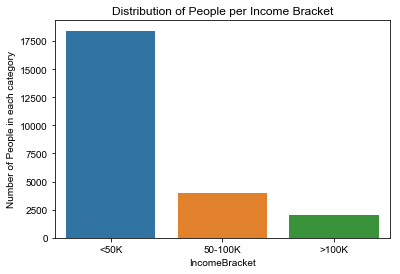

In [18]:
# Exploring how the training data observations are distributed across the categories formed by income brackets
sns.countplot(x='IncomeBracket',data=df_train)
sns.set(style="darkgrid")
# initializing axes
plt.ylabel('Number of People in each category')
plt.title('Distribution of People per Income Bracket')
plt.show()

From the plot above we can conclude that  majority of people in training dataset fall into the <50K income bracket. Another observation is that fewer people are included in higher income level category and this trend is continious along with gowing range of income bracket category (e.g. least number of people is observed in > 100K category. Having that in mind we should be expecting higher levels of errors for the two categories with highest income bracket due to relatively lower number of observations in these categories.

####  Income Bracket vs Age on training data

#### let's first construct an age distribution frequency diagram vs number of people

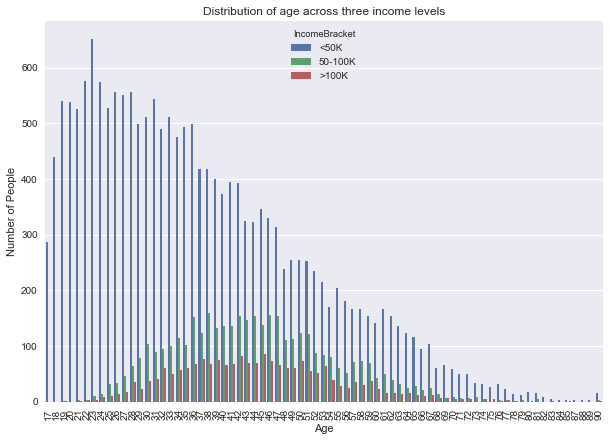

In [19]:
# Distribution of age across three income levels
ax, figure = plt.subplots(figsize=(10,7))
sns.set(style="darkgrid")
sns.countplot(x='Age',hue='IncomeBracket',  data=df_train)

# initializing  axes
plt.xticks(rotation = 90)
plt.ylabel('Number of People')
plt.title('Distribution of age across three income levels')
plt.show()

#### let's construct a boxplot now

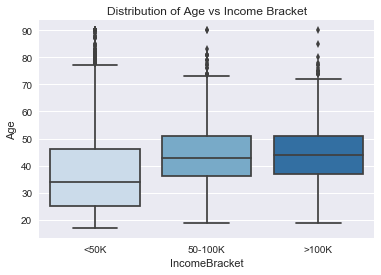

In [20]:
sns.boxplot(x='IncomeBracket', y='Age', data=df_train,palette="Blues")
plt.title('Distribution of Age vs Income Bracket')
plt.show()

Following conclusions could be derived from plots above. First, that the lowest income bracket represents younger population. Secondly, the middle and highest bracket have approximately comparable age range and they both are only slightly higher age-wise than the people with lowest income bracket.

#### Gender vs Income Bracket on training data

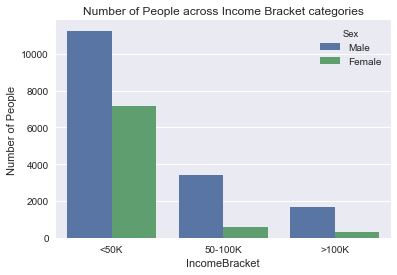

In [21]:
sns.countplot(x='IncomeBracket', hue='Sex', data=df_train)
sns.set(style="darkgrid")

# initializing  axes
plt.ylabel('Number of People')
plt.title('Number of People across Income Bracket categories')
plt.show()

From the graph above we could notice an interesting observation: the ratio of females to males in the lowest income bracket is way higher than that of the two other categories.This may hint us that it's still relatively easier for the females to compete with males when the income level is lower as compared to the case of higher income level categories

#### Now, for each of the categories, let's print out the total number of males and females on training data

In [22]:
gender_brck = df_train.groupby(['IncomeBracket','Sex']).size()
print (df_train['Sex'].describe())
print(gender_brck)

count     24410
unique        2
top        Male
freq      16352
Name: Sex, dtype: object
IncomeBracket  Sex   
50-100K        Female      581
               Male       3413
<50K           Female     7172
               Male      11250
>100K          Female      305
               Male       1689
dtype: int64


As we can see total number of females is way less and accounts for approximately 33% of total number of people and slightly less than 50% of total number of males. Again this might be leading to higher error levels when running classification algorithms using data on females (especially that applies for cases with higher income brackets).

#### Now, let's plot the distribution total number of hours worked b/w males and females on training data

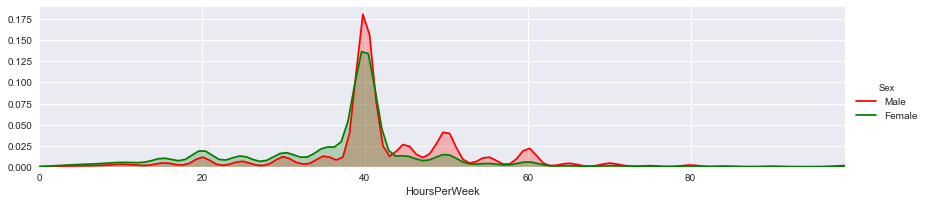

In [23]:
d = {'color': ['r', 'g']}
facet = sns.FacetGrid(df_train, hue="Sex", hue_kws=d, aspect=4)
facet.map(sns.kdeplot,'HoursPerWeek',shade= True)
facet.set(xlim=(0, df_train['HoursPerWeek'].max()))
facet.add_legend()
plt.show()

As expected the peak of working hours is indicated as 40 hours, which is somewhat equal to average workweek hours. But one thing should be noticed, which is accounting for the fact that males work longer hours throughout a week. Also we could see that more females than males work less than 40 hours per week.

#### Now let's draw factplots categorized by gender on training data

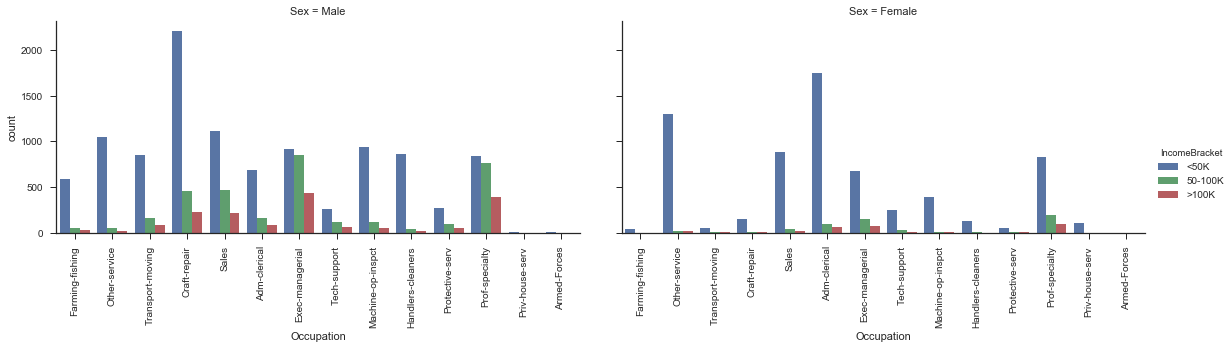

In [24]:
sns.set(style="ticks")
fplt = sns.factorplot(x="Occupation", hue='IncomeBracket', col="Sex",
                   data=df_train, kind="count",
                    size=4, aspect=2, estimator=mean)
fplt.set_xticklabels(rotation=90)
plt.show()

We can see that in follwoing categories Farming-fishing, Transport-moving, Craft repair - males are dominating; from another hand, number of women is predominant in Adm-clerical and even in uncategorized Other-service.

#### Capital Gain vs Income Bracket on training data

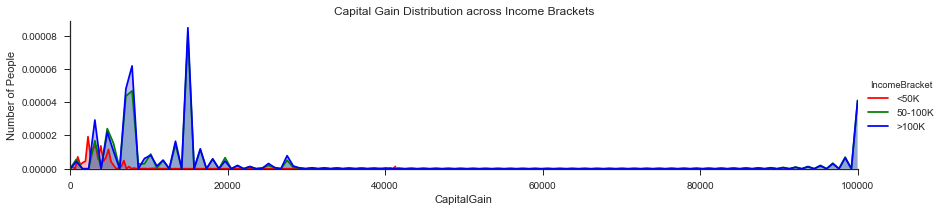

In [25]:
d = {'color': ['r', 'g', 'b']}
facet = sns.FacetGrid(df_train, hue="IncomeBracket",  hue_kws=d,aspect=4)
facet.map(sns.kdeplot,'CapitalGain',shade= True)
facet.set(xlim=(0, df_train['CapitalGain'].max()))
facet.add_legend()
plt.ylabel('Number of People')
plt.title('Capital Gain Distribution across Income Brackets')
plt.show()

From this plot we can see a clear uneven distribution of the income generated from selling assets (stocks, options, etc) across different categories of income bracket. The lower income bracket has only less than 20K capital gain, while the highest income gain has the highest capital gain.

#### Education Trends on training data

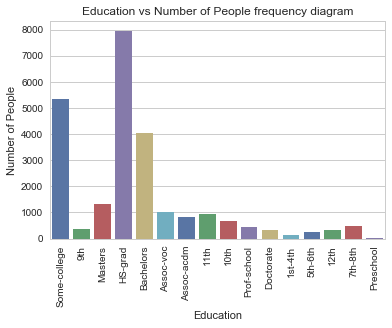

In [26]:
sns.set_style('whitegrid')
palette = sns.color_palette()
sns.countplot(x='Education',  data=df_train, palette=palette)
# initialize axes 
plt.xticks( rotation = 90)
plt.ylabel('Number of People')
plt.title('Education vs Number of People frequency diagram')
plt.show()

The majority of people appears to have High School diploma, the second major subgroup is people with some college degree and the third largest group represent people with Bachelor's degree

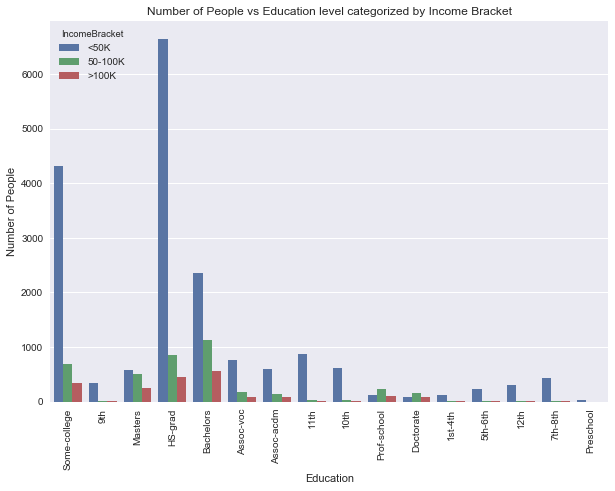

In [27]:
sns.set_style('darkgrid')
palette = sns.color_palette()
ax, figure = plt.subplots(figsize=(10,7))
sns.countplot(x='Education', hue='IncomeBracket', data=df_train,palette=palette)

# initialize  axes
plt.ylabel('Number of People')
plt.xticks( rotation = 90)
plt.title('Number of People vs Education level categorized by Income Bracket')
plt.show()

If we consider elementary school levels (1st-4th, 5th-6th, 7th-8th) vs another extreme - the Doctorate lavel we couls see that the vast majority majority in first case would have <50K income bracket, with higher income brackets acocunting for Doctorate lavel

## Patching missing data

Plotting the heatmap of training dataset to determinte missing data columns/cells

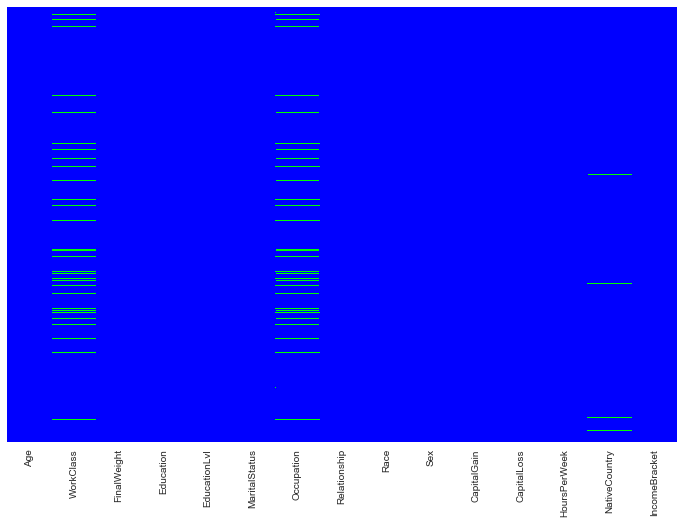

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_train.isnull(), cmap='brg', yticklabels=False, cbar=False, ax=ax)
plt.show()

We could see from tha above heatmap that the columns with missing cells are WorkClass, Occupation and NativeCountry. Also that the shape of  WorkClass, Occupation in the heatmap above are quite similar

#### Let's visualize missing data for the test data as well

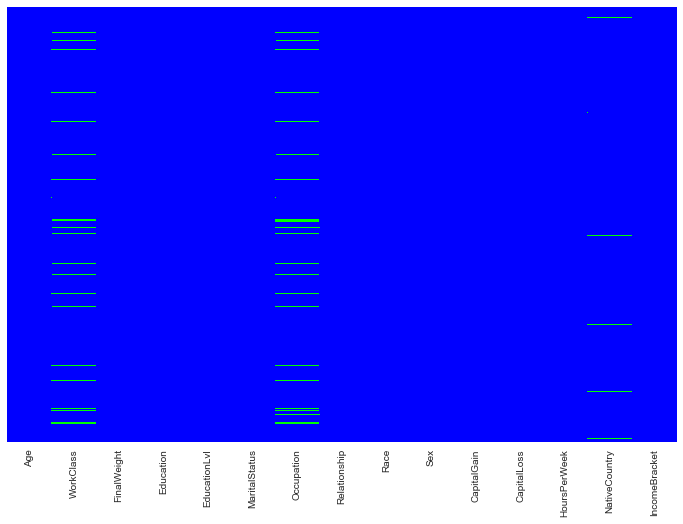

In [29]:
#  test data has missing values for the same features as for training data
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_test.isnull(), cmap='brg', yticklabels=False, cbar=False, ax=ax)
plt.show()

Possible explanation for missing data on those columns could be that people filling it simply neglected those graphs. The same applies perhaps to cases of missing country. It could be that Native Country did not appear at all in the list of options




Quick glance at the rows of the data with missing information.

In [30]:
print("Total amount of data entries with missing Occupation")
print(df_train.loc[df_train.Occupation.isnull()].count())

print("Total amount of data entries with missing WorkClass")
print(df_train.loc[df_train.WorkClass.isnull()].count())

Total amount of data entries with missing Occupation
Age              1389
WorkClass           6
FinalWeight      1389
Education        1389
EducationLvl     1389
MaritalStatus    1389
Occupation          0
Relationship     1389
Race             1389
Sex              1389
CapitalGain      1389
CapitalLoss      1389
HoursPerWeek     1389
NativeCountry    1371
IncomeBracket    1389
dtype: int64
Total amount of data entries with missing WorkClass
Age              1383
WorkClass           0
FinalWeight      1383
Education        1383
EducationLvl     1383
MaritalStatus    1383
Occupation          0
Relationship     1383
Race             1383
Sex              1383
CapitalGain      1383
CapitalLoss      1383
HoursPerWeek     1383
NativeCountry    1365
IncomeBracket    1383
dtype: int64


#### Now for both training and test datasets let's explore those entries which both have Work-class = 'Never worked' and empty Occupation

In [31]:
df_train.loc[(df_train.WorkClass.notnull()) & (df_train.Occupation.isnull())]

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
967,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<50K
5364,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<50K
12944,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<50K
13116,17,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<50K
21769,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<50K
22910,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<50K


In [32]:
df_test.loc[(df_test.WorkClass.notnull()) & (df_test.Occupation.isnull())]

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
6035,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<50K
11455,18,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<50K


For those entries which both have Work-class = 'Never worked' and empty Occupation we can presume that they do not have any occupation to present , as there's no such NaN category has no associated category = unemployed. We will introduce such one below.


In [33]:
df_train.loc[(df_train.Occupation.isnull()) & (df_train.WorkClass.notnull()), 'Occupation'] = 'Unemployed'
df_test.loc[(df_test.Occupation.isnull()) & (df_test.WorkClass.notnull()), 'Occupation'] = 'Unemployed'

#### Let's now explore the Workclass of training dataset 

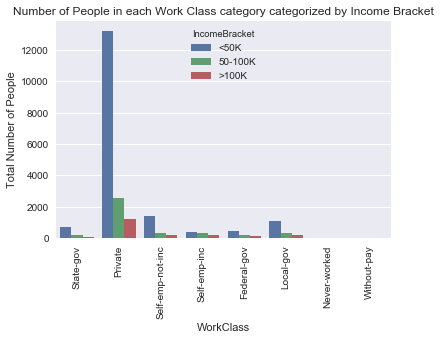

In [34]:

sns.set_style('darkgrid')
palette = sns.color_palette()
sns.countplot(x='WorkClass', hue='IncomeBracket', data=df_train, palette = palette)

# initializing axes
plt.ylabel('Total Number of People')
plt.xticks( rotation = 90)
plt.title('Number of People in each Work Class category categorized by Income Bracket')
plt.show()

We could notie that majority of people are falling into category = 'Private'. We could also aproceed with assumption that, consequently, the probability of missing data falling into category = 'Private' is highest. We will pick category = 'Private' for the rest of missing data. Details are below:

In [35]:
df_train.loc[df_train.WorkClass.isnull(), 'WorkClass'] = 'Private'
df_test.loc[df_test.WorkClass.isnull(), 'WorkClass'] = 'Private'

# let's check now the content of  df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24410 entries, 0 to 24420
Data columns (total 15 columns):
Age              24410 non-null int64
WorkClass        24410 non-null object
FinalWeight      24410 non-null int64
Education        24410 non-null object
EducationLvl     24410 non-null int64
MaritalStatus    24410 non-null object
Occupation       23027 non-null object
Relationship     24410 non-null object
Race             24410 non-null object
Sex              24410 non-null object
CapitalGain      24410 non-null int64
CapitalLoss      24410 non-null int64
HoursPerWeek     24410 non-null int64
NativeCountry    24015 non-null object
IncomeBracket    24410 non-null object
dtypes: int64(6), object(9)
memory usage: 3.6+ MB


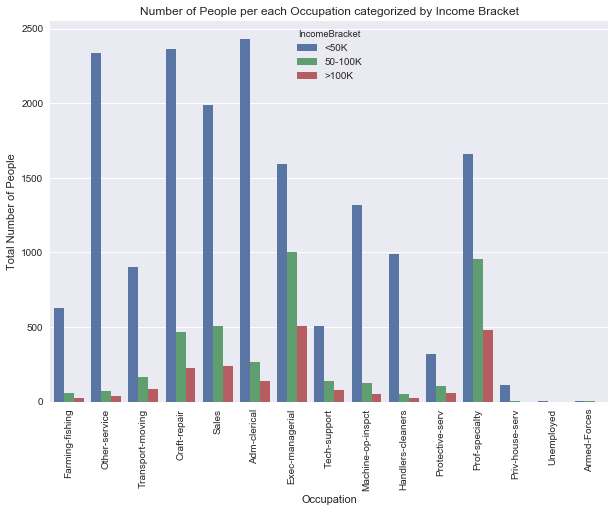

In [36]:
# lets see the frequency diagram for occupations
sns.set_style('darkgrid')
palette = sns.color_palette()
ax, figure = plt.subplots(figsize=(10,7))
sns.countplot(x='Occupation',hue='IncomeBracket',data=df_train, palette =palette)


# initializing axes
plt.ylabel('Total Number of People')
plt.title('Number of People per each Occupation categorized by Income Bracket')
plt.xticks( rotation = 90)
plt.show()

We could notice that with the exception of Private House Services and Armed Forces, the rest of occupations have all three  levels of income. Professors and executives have both highest number of people falling into 2 hoghest paying categories. Also virtually all categories have majority of <50 K income braket in terms of number of people involved. It is worth mentioning that top three categories with the most number of people in them are Craft repair, Admin services and Other services

Furthermore, lets explore the relationship between occupation and the education level for training dataset

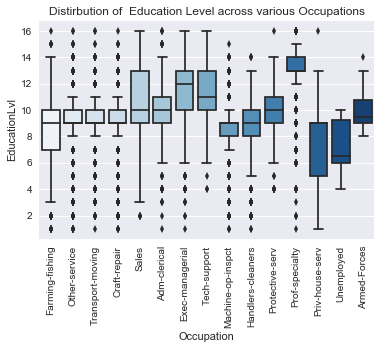

In [37]:
#plotting a boxplot for training dataset
plt.title('Distirbution of  Education Level across various Occupations')
plt.xticks(rotation=90)
sns.set(style="darkgrid")
sns.boxplot(x="Occupation", y="EducationLvl", data=df_train, palette='Blues')
plt.show()

Let's explore the diagram on Average Education Level of People across various Occupations

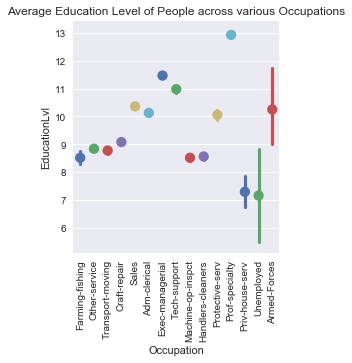

In [38]:
sns.set_style('darkgrid')
palette = sns.color_palette()
sns.factorplot(x="Occupation", y='EducationLvl', data=df_train, palette=palette ,  estimator=mean)
plt.title('Average Education Level of People across various Occupations')
plt.xticks(rotation=90)
plt.show()

We can see that for certain occupations the Education level is crucial. That becomes apparent when we look at occupations of Professos and  High level executive managers. Furthermore,  we will place all the missing data in education level 12 and 11 into managerial position despite both occupations have close mean with mean education level of technical support being close to 11 as well. We could do this due to the fact that the number of managers is more than the tech support specialists.

Also, as long as Sales occupation has lots of observations with mean education level 10, we will assign education level 10 to sales for the missing data. In same fashion we'll set missing data with value of 9 for Clerks, < 7 to Private Services, and drop the rest.

We are aiming to keep here as many observations as it's possible for better results on training data. Eventhough these classes might not event be significant as others in terms of predicting the Income bracket, "massaging" data in such fashion allows us to preserrve potentially valuable informaiton. However, there's a downside, which could be refelcted in increased correlation between Education Level and Occupation feature variables

In [39]:
df_train.loc[(df_train.EducationLvl >= 13)&(df_train.Occupation.isnull()) , 'Occupation'] = 'Prof-specialty'
df_train.loc[(df_train.EducationLvl == 12)&(df_train.Occupation.isnull()) , 'Occupation'] = 'Exec-managerial'
df_train.loc[(df_train.EducationLvl == 11)&(df_train.Occupation.isnull()) , 'Occupation'] = 'Exec-managerial'
df_train.loc[(df_train.EducationLvl == 10)&(df_train.Occupation.isnull()) , 'Occupation'] = 'Sales'
df_train.loc[(df_train.EducationLvl == 9)&(df_train.Occupation.isnull()) , 'Occupation'] = 'Adm-clerical'
df_train.loc[(df_train.EducationLvl < 7)&(df_train.Occupation.isnull()) , 'Occupation'] = 'Priv-house-serv'

df_test.loc[(df_test.EducationLvl >= 13)&(df_test.Occupation.isnull()) , 'Occupation'] = 'Prof-specialty'
df_test.loc[(df_test.EducationLvl == 12)&(df_test.Occupation.isnull()) , 'Occupation'] = 'Exec-managerial'
df_test.loc[(df_test.EducationLvl == 11)&(df_test.Occupation.isnull()) , 'Occupation'] = 'Exec-managerial'
df_test.loc[(df_test.EducationLvl == 10)&(df_test.Occupation.isnull()) , 'Occupation'] = 'Sales'
df_test.loc[(df_test.EducationLvl == 9)&(df_test.Occupation.isnull()) , 'Occupation'] = 'Adm-clerical'
df_test.loc[(df_test.EducationLvl < 7)&(df_test.Occupation.isnull()) , 'Occupation'] = 'Priv-house-serv'

# since better accuracy prediciton is not something always feasible we'd be dropping some of missing data


#dropping na the missing values of the Occupation column 
df_train.dropna(subset=['Occupation'],inplace = True) 
df_test.dropna(subset=['Occupation'],inplace = True) 

# let's check if there's an increase in the total number of Occupation  
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24303 entries, 0 to 24420
Data columns (total 15 columns):
Age              24303 non-null int64
WorkClass        24303 non-null object
FinalWeight      24303 non-null int64
Education        24303 non-null object
EducationLvl     24303 non-null int64
MaritalStatus    24303 non-null object
Occupation       24303 non-null object
Relationship     24303 non-null object
Race             24303 non-null object
Sex              24303 non-null object
CapitalGain      24303 non-null int64
CapitalLoss      24303 non-null int64
HoursPerWeek     24303 non-null int64
NativeCountry    23908 non-null object
IncomeBracket    24303 non-null object
dtypes: int64(6), object(9)
memory usage: 3.0+ MB


#### Now let's explore the frequency distribution by Native Country in the training dataset 

the top category is United-States, with total entries of 95.5%


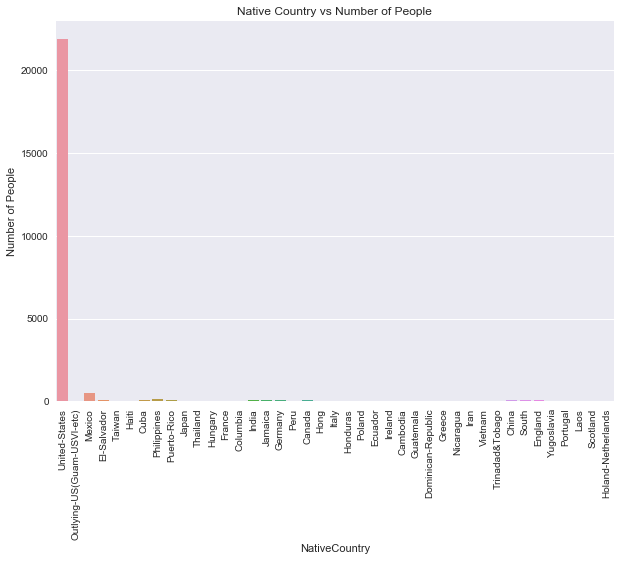

In [40]:
nat_country= df_train['NativeCountry'].describe()
print('the top category is {}, with total entries of {}%'.format(nat_country.top, round((nat_country.freq/22898)*100,1)))
ax, figure = plt.subplots(figsize=(10,7))
sns.set(style="darkgrid")
sns.countplot(x='NativeCountry', data=df_train)
# set axes labels and title
plt.ylabel('Number of People')
plt.xticks( rotation = 90)
plt.title('Native Country vs Number of People')
plt.show()

We see that more than 90% indicated USA in the NativeCountry column. We could safely proceed with converting missing data entries for NativeCountry to USA


In [41]:
# Setting the defult NativeCountry to United-States for case of missing data entries
df_train.loc[df_train.NativeCountry.isnull() , 'NativeCountry'] = 'United-States'
df_test.loc[df_test.NativeCountry.isnull() , 'NativeCountry'] = 'United-States'

We would also like to explore if there is any difference between the Education and EducationLvl columns. 

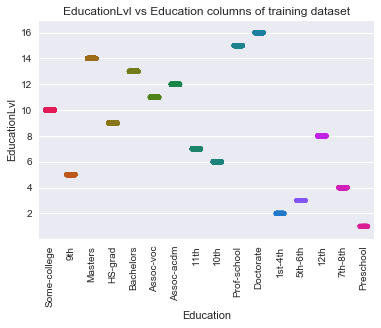

In [42]:
sns.stripplot(x="Education", y="EducationLvl", data=df_train, jitter=0.2,  palette=sns.husl_palette(16, l=0.5, s=.95))
plt.ylabel('EducationLvl')
plt.xticks( rotation = 90)
plt.title('EducationLvl vs Education columns of training dataset')
plt.show()

We could safely conclude that the information provide in Education vs EducationLvl columns is redundant and that EducationLvl represents just the numerical values of Education column. Without loss of data, we will keep that numerical column for the simplicity of calculations (we'd have to turn the data into numerical values anyways).

In [43]:
df_train = df_train.drop(['Education'], axis=1)
df_test = df_test.drop(['Education'], axis=1)

### Converting data into numerical format

scikit-learn operates only  with  numerical values, hence we must do a data conversion. 
This is done by introducing dummy variables. A new column is introduced for each feature in following way: 
a certain column value for a given ctegory will be assigned value =1 if the original feature belongs to that category.
Only one of the categorical feature columns can have of 1. 
This approach is deemed to be more efficient, but it has a drawback: because the columns is increased and is being stored in a large sparse matrix

In [50]:
dummy_WorkClass_train = pd.get_dummies(df_train['WorkClass'], prefix='WorkClass')
dummy_MaritalStatus_train = pd.get_dummies(df_train['MaritalStatus'], prefix='MaritalStatus')
dummys_Occupation_train = pd.get_dummies(df_train['Occupation'], prefix='Occupation')
dummys_Relationship_train = pd.get_dummies(df_train['Relationship'], prefix='Relationship')
dummy_Race_train = pd.get_dummies(df_train['Race'], prefix='Race')
dummy_Sex_train = pd.get_dummies(df_train['Sex'], prefix='Sex')
dummy_NativeCountry_train = pd.get_dummies(df_train['NativeCountry'], prefix='NativeCountry')

# new feature is added to dataframe
tempDF = pd.concat([df_train, dummy_WorkClass_train, dummy_MaritalStatus_train,
                    dummys_Occupation_train, dummys_Relationship_train,
                   dummy_Race_train, dummy_Sex_train, dummy_NativeCountry_train], axis=1)

# original feature columns are dropped below
tempDF = tempDF.drop(['WorkClass','MaritalStatus','Occupation','Relationship',
                     'Race', 'Sex', 'NativeCountry'],axis=1)

# every other one of the dummy variables is dropped because of the fact that its value is assumed
X_train = tempDF.drop(['WorkClass_Never-worked','MaritalStatus_Never-married',
                       'Occupation_Unemployed','Relationship_Other-relative',
                        'Race_Other', 'Sex_Male', 'NativeCountry_Cuba'],axis=1)

X_train.head()

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket,WorkClass_Federal-gov,WorkClass_Local-gov,WorkClass_Private,...,NativeCountry_Portugal,NativeCountry_Puerto-Rico,NativeCountry_Scotland,NativeCountry_South,NativeCountry_Taiwan,NativeCountry_Thailand,NativeCountry_Trinadad&Tobago,NativeCountry_United-States,NativeCountry_Vietnam,NativeCountry_Yugoslavia
0,42,179151,10,0,0,40,<50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,28,68021,10,0,0,30,<50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,24,233499,10,0,0,40,50-100K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,32,168782,5,0,0,32,<50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,55,105582,14,2228,0,50,<50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Introducing Baseline performance

We'll perform one selected algorithms (Logistic Regression in this case as baseline performance algorithm) on both traininf and test data. We will not do any feature engineering here and keep a hope that the other algorithms will demonstrate improvements as compared to baseline performance.

##### Re-Scalling values

Featues which have different scales couls lead to certain problems. We should keep in mind that majority of models are utilizing the Euclidean Distances. In other words, the features with greater scales would have a larger impact on the outcome and, consequently, the smaller values would have lesser impact.
To avoid this we could scale the independent values.


In [51]:
#invoking tandardScaler and creating an obcect of that class
fitting_scaler = StandardScaler()
X_combined = X_train.drop(['IncomeBracket'], axis=1)
X_combined = fitting_scaler.fit_transform(X_combined)

dictionary = {'<50K': 0, '50-100K':1, '>100K':2}
df_train['IncomeBracket'] = df_train['IncomeBracket'].map(dictionary)
df_test['IncomeBracket'] = df_test['IncomeBracket'].map(dictionary)

# variable we are trying to predict
y = df_train.IncomeBracket


##### Cross Validation

Ideally we are aiming for a model with low bias and low variance. But there's always a question of which is the optimal tradeoff between these two, since not always (actually almost never) those 2 objectivs could be achieved simultaneously


The idea behind Cross-validation is to partition the training set into distinct training and testing sets so that the model could be trained and tested multiple times.
KFold Cross Validation implies split of training set into k equal chunks. 
Out of these k subsamples, a single chunk is used for testing, and the remaining k-1 samples are used for training. 

This process is repeated for k times, and each time a different sample is used for testing (also training subset is changed accordingly). As a result each chunk is tested one time only. 

Finally we'd gather  10 indicators of accuracies for those outputs of the model and calculate the average accuracy as well as st.dev.  of the accuracy. From theory we know that the higher the average accuracy is, the lower is the bias. And , conversely, the lower the standard deviation is, the lower is the variance, thus, representing the true performance of the model on the training set.

In [52]:
def kfold_model_run(model, X, y, K=10):
    kfold = KFold(n_splits=K)
    kfold.get_n_splits(X)
    accuracy = np.zeros(K)
    np_idx = 0
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]

        model.fit(X_train, y_train)

        predictions = model.predict(X_test)

        ACC = accuracy_score(y_test, predictions)
        accuracy[np_idx] = ACC*100
        np_idx += 1

        print ("Fold {}: Accuracy: {}".format(np_idx, round(ACC,3)))   

    print ("Average Score is: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))
    return model

In [53]:
# we'll run the logistic regression model with all the features included
start_time = time.time()
lg = LogisticRegression()
kfold_model_run(lg, X_combined, y)
elapsedtime = time.time() - start_time
print('Time taken to run this model is {}'.format(elapsedtime))
print('Total number of features are: {}'.format(X_combined.shape[1]))

Fold 1: Accuracy: 0.802
Fold 2: Accuracy: 0.796
Fold 3: Accuracy: 0.802
Fold 4: Accuracy: 0.812
Fold 5: Accuracy: 0.807
Fold 6: Accuracy: 0.8
Fold 7: Accuracy: 0.797
Fold 8: Accuracy: 0.794
Fold 9: Accuracy: 0.805
Fold 10: Accuracy: 0.794
Average Score is: 80.085%(0.555%)
Time taken to run this model is 112.81905388832092
Total number of features are: 83


We could observe around 80% is our baseline accuracy.
Feature has lot of categories and quite new columns are generated, while not all of them being significant. Hence, we can eliminate some of columns and, consequently very small portion of data is attributed to other countries. Hence, we can eliminate those by introducing a dummy categorical variable with values "Yes" or "No" meaning belonging to USA.

### Feature Selection

In [54]:
df_train.loc[df_train['NativeCountry'] != 'United-States', 'NativeCountry'] = 'Other'
df_test.loc[df_test['NativeCountry'] != 'United-States', 'NativeCountry'] = 'Other'

Furthermore, when we inspect the feature definitions, we could observe a lot of common information in Relationship and MaritalStatus. Since both are categorical variables, we'll perform chi-square test on those to discover if these variables have any dependance between each other.

In [55]:
relations = pd.crosstab(df_train['Relationship'],df_train['MaritalStatus'])
chi, p, dof, expected = stats.chi2_contingency(relations)
print('p-value is {}, and Chi-squared value is {}'.format(p,chi))

p-value is 0.0, and Chi-squared value is 28833.71605564572


We see that the association between these two features is strong. We would convert the categories in MaritalStatus to either married, single, or married-spouse-absent in order to reduce number of columns. As long as these two valiables share similar information and also they are dependent we can select one for modelling and eliminate the other one. This is done after getting most important features from the gradient boost search of most important features.

In [56]:
df_train['MaritalStatus'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married',inplace= True)
df_train['MaritalStatus'].replace(['Divorced', 'Never-married','Separated','Widowed'], 'Single',inplace= True)

df_test['MaritalStatus'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married',inplace= True)
df_test['MaritalStatus'].replace(['Divorced', 'Never-married','Separated','Widowed'], 'Single',inplace= True)
df_train.groupby(['Relationship',"MaritalStatus"]).count()

Age  WorkClass  FinalWeight  \
Relationship   MaritalStatus                                         
Husband        Married                9904       9904         9904   
Not-in-family  Married                  10         10           10   
               Married-spouse-absent   145        145          145   
               Single                 6100       6100         6100   
Other-relative Married                 101        101          101   
               Married-spouse-absent    27         27           27   
               Single                  601        601          601   
Own-child      Married                  81         81           81   
               Married-spouse-absent    32         32           32   
               Single                 3586       3586         3586   
Unmarried      Married-spouse-absent    99         99           99   
               Single                 2438       2438         2438   
Wife           Married                1179       1179         1179   

                                      EducationLvl  Occupation  Race   Sex  \
Relationship   MaritalStatus                                                 
Husband        Married                        9904        9904  9904  9904   
Not-in-family  Married                          10          10    10    10   
               Married-spouse-absent           145         145   145   145   
               Single                         6100        6100  6100  6100   
Other-relative Married                         101         101   101   101   
               Married-spouse-absent            27          27    27    27   
               Single                          601         601   601   601   
Own-child      Married                          81          81    81    81   
               Married-spouse-absent            32          32    32    32   
               Single                         3586        3586  3586  3586   
Unmarried      Married-spouse-absent            99          99    99    99   
               Single                         2438        2438  2438  2438   
Wife           Married                        1179        1179  1179  1179   

                                      CapitalGain  CapitalLoss  HoursPerWeek  \
Relationship   MaritalStatus                                                   
Husband        Married                       9904         9904          9904   
Not-in-family  Married                         10           10            10   
               Married-spouse-absent          145          145           145   
               Single                        6100         6100          6100   
Other-relative Married                        101          101           101   
               Married-spouse-absent           27           27            27   
               Single                         601          601           601   
Own-child      Married                         81           81            81   
               Married-spouse-absent           32           32            32   
               Single                        3586         3586          3586   
Unmarried      Married-spouse-absent           99           99            99   
               Single                        2438         2438          2438   
Wife           Married                       1179         1179          1179   

                                      NativeCountry  IncomeBracket  
Relationship   MaritalStatus                                        
Husband        Married                         9904           9904  
Not-in-family  Married                           10             10  
               Married-spouse-absent            145            145  
               Single                          6100           6100  
Other-relative Married                          101            101  
               Married-spouse-absent             27             27  
               Single                           601            6

Relationship feature provides similar information although not quite the same. We note that husband and wife are supposed to be married and we proceed by converting husbad and wife into married, and eliminate a redundant column. Thsi could be done since we know that married with info on sex would provide us with complete info like wife/husband would have done. 

In [57]:
df_train['Relationship'].replace(['Husband', 'Wife'], 'Married',inplace= True)
df_test['Relationship'].replace(['Husband', 'Wife'], 'Married',inplace= True)

In [58]:
corr = df_train.corr()
corr

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket
Age,1.000000,-0.084831,0.037711,0.075202,0.059309,0.067095,0.214910
FinalWeight,-0.084831,1.000000,-0.040556,-0.005117,0.002361,-0.015507,-0.008348
EducationLvl,0.037711,-0.040556,1.000000,0.131608,0.079196,0.141477,0.310816
CapitalGain,0.075202,-0.005117,0.131608,1.000000,-0.032298,0.089569,0.206374
CapitalLoss,0.059309,0.002361,0.079196,-0.032298,1.000000,0.055415,0.138774
HoursPerWeek,0.067095,-0.015507,0.141477,0.089569,0.055415,1.000000,0.215998
IncomeBracket,0.214910,-0.008348,0.310816,0.206374,0.138774,0.215998,1.000000


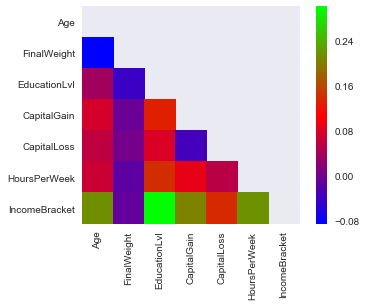

In [60]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap='brg')
plt.show()

By building a correlation matrix obtained on numerical features after maping the income bracket we see that the highest correlation is between the EducationLvl and the Income bracket, which is followed by Age, HoursPerWeek, CapitalGain, and finally Capital Loss. 

The Final Weight seems to have the least correlation to Income Bracket. 
Furthermore, only numerical features are displayed here. In in order to be able to get the correlation of categorical data to target value, we must first convert the variables to numerical using one-hot-coding. In that way there would be no ordinal assumption made by the algorithms while corrolation and later models are calculated/used. 

#### Engineering a New Feature 

A new feature  called the Net capital gain is going to be added to the dataset. It's calculated as Individual's Capital Gain minus that individuals Capital Loss. By introducing this feature we can "merge" the information provided in two columns. The interpretation of negative value means that the capital loss is higher than capital gain, while the positive value means that the gain of the individual was higher. 
This would allows us to drop the two columns and keep only one of them for processing, thus, improving algorithms' data computation. 

In general feature engineering is useful for taking out the redundant information, thus improving model by making features more independent of one another and by making the computation faster. 

In [61]:
# will introduce NetGain() method below
def NetGain(Capital):
    CapitalGain, CapitalLoss = Capital
    Net = CapitalGain - CapitalLoss
    return Net

df_train['NetCapital'] = df_train[['CapitalGain', 'CapitalLoss']].apply(NetGain, axis=1)
df_test['NetCapital'] = df_test[['CapitalGain', 'CapitalLoss']].apply(NetGain, axis=1)
df_train = df_train.drop(['CapitalGain', 'CapitalLoss'], axis=1)
df_test = df_test.drop(['CapitalGain', 'CapitalLoss'], axis=1)

#### Feature Selection  and further Converting categorical data to numerical values

In [62]:
def makeDfDummy(DF):
    tempDF = pd.get_dummies(DF) 
    # Dropping one of each of the dummy variables because its value is assumed
    X = tempDF.drop(['WorkClass_Never-worked','Occupation_Unemployed',
                     'Relationship_Other-relative','Race_Other', 'Sex_Male', 
                     'NativeCountry_Other','MaritalStatus_Married-spouse-absent'],axis=1)
    return X

X_train = makeDfDummy(df_train)
X_test = makeDfDummy(df_test)

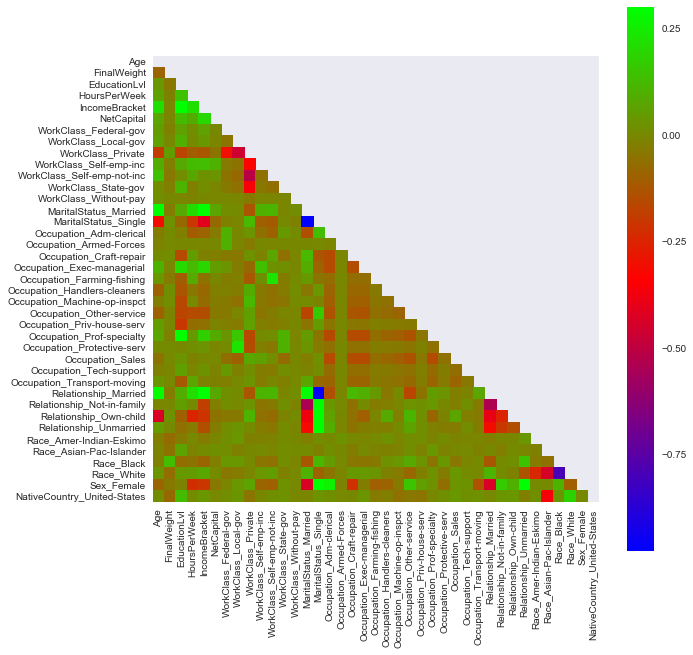

In [64]:
ax, figure = plt.subplots(figsize=(10,10))
corr = X_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap='brg')
plt.show()

We could see from the  correlation map above that many of features do not have high correlations to the income bracket. Hence,  we can eliminate a lot of them. 
Furthermore, in order to identify which features have the highest impact on the model, we used the important feature detector of the gradient boosting to determine the most important features to be retained. 

In [65]:
# Seperating X and Y
X_train = X_train.drop(['IncomeBracket'], axis=1)
y_train = df_train.IncomeBracket

X_test = X_test.drop(['IncomeBracket'], axis=1)
y_test = df_test.IncomeBracket

In [66]:
# storing the feature names in order 
feature_names = X_train.columns

#### Elimination of Features

In [69]:
# scale features 
X_train_scale = fitting_scaler.fit_transform(X_train)

In [70]:
# Initilize the model and fit it with training data.
g_boost = XGBClassifier()
kfold_model_run(g_boost, X_train_scale, y_train, K=3)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Fold 1: Accuracy: 0.814


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Fold 2: Accuracy: 0.818
Fold 3: Accuracy: 0.809
Average Score is: 81.332%(0.37%)


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

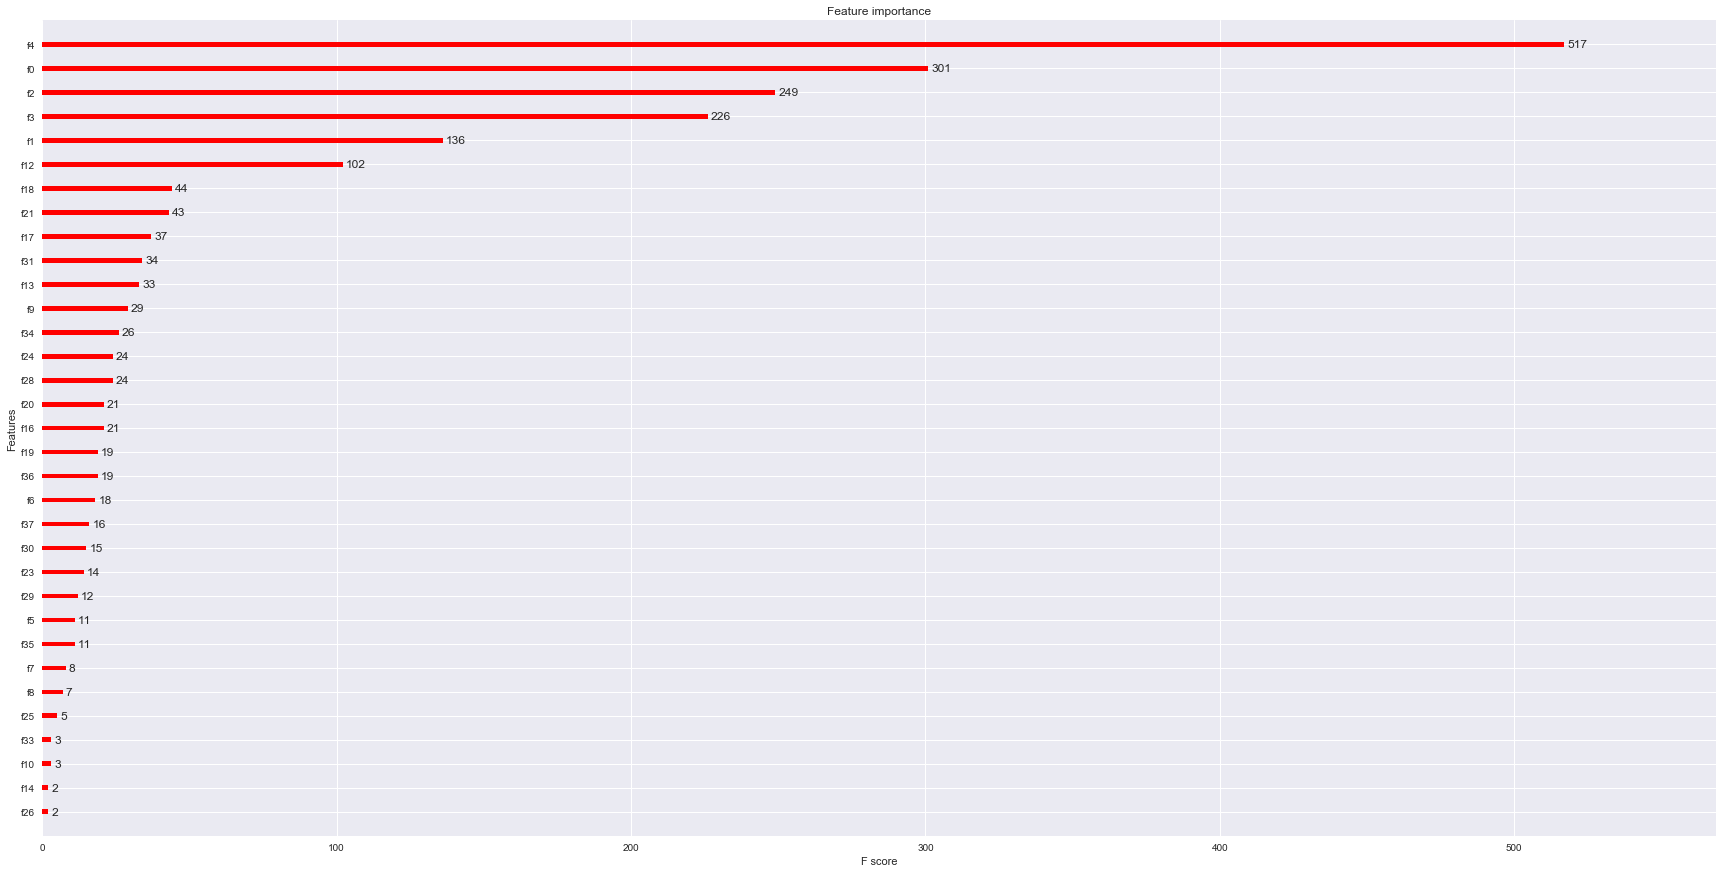

In [73]:
# building the importance plot
ax = plot_importance(g_boost, color='red')
fig = ax.figure
fig.set_size_inches(30, 15)
plt.show()

In [75]:
feature = g_boost.feature_importances_
Dic = dict(zip(feature_names,feature))
print('Top features sorted in order are:')

print(feature_names[4])
print(feature_names[0])
print(feature_names[2])
print(feature_names[3])
print(feature_names[1])
print(feature_names[12])
print(feature_names[18])
print(feature_names[21])
print(feature_names[17])
print(feature_names[9])
print(feature_names[34])
print(feature_names[24])
print(feature_names[28])
print(feature_names[20])
print(feature_names[16])

Top features sorted in order are:
NetCapital
Age
EducationLvl
HoursPerWeek
FinalWeight
MaritalStatus_Married
Occupation_Farming-fishing
Occupation_Other-service
Occupation_Exec-managerial
WorkClass_Self-emp-not-inc
Race_Black
Occupation_Protective-serv
Relationship_Married
Occupation_Machine-op-inspct
Occupation_Craft-repair


We could observe an apparent relation b/w Capital gain as well as age and education level from one hand and the target variable from another. Now we'll try to observe how the model performs with top ten, and then 15 features. The implicaiton of eliminating features is in model's becoming less accurate, but that elimination is yielding less computations from another hand.

In [76]:
print('Slecting top 10 features')
X_train_less = X_train[['NetCapital','Age','EducationLvl','HoursPerWeek','FinalWeight',
                      'Relationship_Married','Occupation_Other-service',
                      'Occupation_Farming-fishing','Occupation_Exec-managerial',
                      'WorkClass_Self-emp-not-inc']]
# scale features 
X_train_scale = fitting_scaler.fit_transform(X_train_less)

start_time = time.time()
kfold_model_run(lg, X_train_scale, y_train)
elapsedtime = time.time() - start_time
print('Time taken to run this model is {} sec'.format(elapsedtime))

print('Slecting top 15 features')
X_train_less = X_train[['NetCapital','Age','EducationLvl','HoursPerWeek','FinalWeight',
                      'Relationship_Married','Occupation_Other-service',
                      'Occupation_Farming-fishing','Occupation_Exec-managerial',
                      'WorkClass_Self-emp-not-inc','WorkClass_Local-gov',
                       'Occupation_Machine-op-inspct','Occupation_Handlers-cleaners',
                      'Race_Black','Occupation_Protective-serv']]
# scaling the features 
X_train_scale = fitting_scaler.fit_transform(X_train_less)

start_time = time.time()
kfold_model_run(lg, X_train_scale, y_train)
elapsedtime = time.time() - start_time
print('Time taken to run this model is {} sec'.format(elapsedtime))


Slecting top 10 features
Fold 1: Accuracy: 0.794
Fold 2: Accuracy: 0.795
Fold 3: Accuracy: 0.795
Fold 4: Accuracy: 0.809
Fold 5: Accuracy: 0.8
Fold 6: Accuracy: 0.795
Fold 7: Accuracy: 0.787
Fold 8: Accuracy: 0.789
Fold 9: Accuracy: 0.799
Fold 10: Accuracy: 0.789
Average Score is: 79.529%(0.613%)
Time taken to run this model is 7.001459836959839 sec
Slecting top 15 features
Fold 1: Accuracy: 0.794
Fold 2: Accuracy: 0.794
Fold 3: Accuracy: 0.796
Fold 4: Accuracy: 0.813
Fold 5: Accuracy: 0.8
Fold 6: Accuracy: 0.797
Fold 7: Accuracy: 0.79
Fold 8: Accuracy: 0.791
Fold 9: Accuracy: 0.801
Fold 10: Accuracy: 0.789
Average Score is: 79.649%(0.654%)
Time taken to run this model is 9.094418048858643 sec


In [78]:
X_train_less = X_train
i = 0
elim = []
for i in range(len(feature)):
    if feature[i] == 0.0:
        elim.append(X_train_less.columns[i])
        print('Column {} has small Fscore value, thus not important and is eliminated'.format(X_train_less.columns[i]))
X_train_less = X_train_less.drop(elim, axis=1)

X_train_scale = fitting_scaler.fit_transform(X_train_less)
start_time = time.time()
kfold_model_run(lg, X_train_scale, y_train)
elapsedtime = time.time() - start_time
print('Time taken to run this model is {} sec'.format(elapsedtime))


Column WorkClass_Without-pay has small Fscore value, thus not important and is eliminated
Column Occupation_Armed-Forces has small Fscore value, thus not important and is eliminated
Column Occupation_Priv-house-serv has small Fscore value, thus not important and is eliminated
Column Occupation_Transport-moving has small Fscore value, thus not important and is eliminated
Column Race_Amer-Indian-Eskimo has small Fscore value, thus not important and is eliminated
Fold 1: Accuracy: 0.792
Fold 2: Accuracy: 0.796
Fold 3: Accuracy: 0.798
Fold 4: Accuracy: 0.809
Fold 5: Accuracy: 0.799
Fold 6: Accuracy: 0.799
Fold 7: Accuracy: 0.795
Fold 8: Accuracy: 0.789
Fold 9: Accuracy: 0.802
Fold 10: Accuracy: 0.79
Average Score is: 79.682%(0.562%)
Time taken to run this model is 39.00394105911255 sec


After the features with 0 Fscore were removed model accuracy has dropped slightly, and at the same time the variance has increased tiny bit.

In [79]:
X_train_less = X_train

i = 0
elim = []
for i in range(len(feature)):
    if feature[i] <= 0.007:
        elim.append(X_train_less.columns[i])
        print()
        print('Column {} has small Fscore value, thus not important and is eliminated'.format(X_train_less.columns[i]))
X_train_less = X_train_less.drop(elim, axis=1)

X_train_scale = fitting_scaler.fit_transform(X_train_less)
start_time = time.time()
kfold_model_run(lg, X_train_scale, y_train)
elapsedtime = time.time() - start_time
print('Time taken to run this model is {} sec'.format(elapsedtime))
print('Total number of features kept are: {}'.format(X_train_less.columns.size))


Column WorkClass_Federal-gov has small Fscore value, thus not important and is eliminated

Column WorkClass_Private has small Fscore value, thus not important and is eliminated

Column WorkClass_Self-emp-inc has small Fscore value, thus not important and is eliminated

Column WorkClass_State-gov has small Fscore value, thus not important and is eliminated

Column WorkClass_Without-pay has small Fscore value, thus not important and is eliminated

Column Occupation_Adm-clerical has small Fscore value, thus not important and is eliminated

Column Occupation_Armed-Forces has small Fscore value, thus not important and is eliminated

Column Occupation_Priv-house-serv has small Fscore value, thus not important and is eliminated

Column Occupation_Prof-specialty has small Fscore value, thus not important and is eliminated

Column Occupation_Sales has small Fscore value, thus not important and is eliminated

Column Occupation_Tech-support has small Fscore value, thus not important and is elimi

From the results above we can conclude that the model accuracy is very close to the baseline (which had all features included). However, here we used only 22 features instead of 83 and performanceof the algorithm has improved by 9 times roughly. Accuracy, on the other hand, has dropped by less than 0.5% while the variance has incereased by 1% roughly.
Furthermore,  we choose the top 22 important features yielded by gradient boosting algorithm to proceed with model implementation. 


In [80]:
# dropping the same features in the test data
X_train = X_train_less
X_test = X_test.drop(elim, axis=1)

# Model Implementation 

In this section weèll implement five different classification algorithms, namely: Logistic Regression, Random Forest, KNN, Gradient boosting and Decision Tree to be performed on the training dataset using 10-fold cross-validation. 

We are seeqing an answer to following questions: 
1. How is the model acuracy compared across the folds?
2. Which model performs the best?
3. Explanation of each algorithm, pros and cons, and the reason of why it was chosen 

In [81]:
# scaling the features
X_train = fitting_scaler.fit_transform(X_train)

#### logitic regression model
Algorithm: 
Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables 
that determine an outcome. 
The outcome is measured with a dichotomous variable (in which there are only two possible outcomes) (Wikipedia).
L.R. is a supervised classification algorithm, that estimates the probability that y=1 
given the input x. For multi-class problems picks a class that max h_of_theta(x)

#### Pros 
(comparioson is made relative to decision trees): If the signal to noise ratio is low (it is a ‘hard’ problem) logistic regression is likely to perform best. 
In technical terms, if the AUC of the best model is below 0.8, logistic very clearly outperformed tree induction.
provides convenient probability score of observation, efficient implementation. 
Note: the AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier.
also, You have have low signal to noise for a number of reasons - the problem is just inherently unpredictable
dataset or it is too small to ‘find the signal’.
And finally, Trees generally have a harder time coming up with calibrated probabilities as well as
Trees tend to have problems when the base rate is very low.

#### Cons: 
logistic regression does account for the interconneciton among the features, and it doesn't 
performs well when feature space is too large

#### Why Chosen: 
L.R. is the most common algorithm used for solving classification problems 

In [82]:
logistic_reg_model = LogisticRegression()

#### Random Forest model
Algorithm: are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) (Wikipedia). These are supervised ML methods representing forest of decision trees which are randomely divided, normally with low bias and high variance 
#### Pros: 
Reduction in overfitting: by averaging several trees, there is a significantly lower risk of overfitting.
Less variance: By using multiple trees, you reduce the chance of stumbling across a classifier that doesn’t perform well because of the relationship between the train and test data.
#### Cons: 
Ensembles of decision trees (such as Random Forests) are very fast to train, but quite slow to create predictions once trained.
Those are still better than decision trees, yet there's a risk of overfit data

#### Why Chosen: 
Since it addresses the shortcoming of the decision tree as it is a clever extension


In [83]:
Random_Forest_model = RandomForestClassifier()

#### KNN model
Algorithm:  k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. It is a supervised ML approach, which is used for both classification and regression 
problems. Based on the empirically chosen value of K, the alogirhtm identifies the distance 
between the new object and the training data. It then selects the K nearest neighbours and 
classifies the new object based on the majority of votes from neighbours  (Wikipedia)
#### Pros: 
Simple to implement, Flexible to feature/distance choices, Naturally handles multi-class cases.
Also it can do well in practice with enough representative data
#### Cons:
Computationally expensive — because the algorithm stores all of the training data, High memory requirement, Prediction stage might be slow (with big N), Sensitive to irrelevant features and the scale of the data
Also, lower K values results in overfit, while higher K results in underfit
The errors also tend to be large in case of small dataset
#### Why Chosen: 
It is easy to understand the KNN model and tune it



In [84]:
knn_model = KNeighborsClassifier(n_neighbors=20)

#### Gradient boosting model
Algorithm: Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. G.B. works based on the principal of ensemble since it combines a set of weak learners aiming to improve the prediction accuracy. (Wikipedia)
#### Pros: 
from: https://www.quora.com/What-are-the-advantages-disadvantages-of-using-Gradient-Boosting-over-Random-Forests
It is fast; It manages the missing values by itself.; it has higher accuracy as it minimizes an error also it uses modest memory 
#### Cons:
from: https://www.quora.com/What-are-the-advantages-disadvantages-of-using-Gradient-Boosting-over-Random-Forests
Gradient Boosted Methods generally have 3 parameters to train shrinkage parameter, depth of tree, number of trees. Now each of these parameters should be tuned to get a good fit. And you cannot just take maximum value of ntree in this case as GBM can overfit fit higher number of trees. But if you are able to use correct tuning parameters, they generally give somewhat better results than Random Forests.
computationally expensive, difficult to interprate, 
not good for higher dimensional sparse features
#### Why Chosen:
Generally speaking boositing algorithms play a significant role when making bias/variance tradeoff decision.
They control both bias and variance, the next step is optimized by a correction measure calculated in the previous step


In [85]:
g_boost = XGBClassifier()

#### Decision Tree model
Algorithm: It is the model of computation or communication in which an algorithm or communication process is considered to be basically a decision tree, i.e., a sequence of branching operations based on comparisons of some quantities, the comparisons being assigned the unit computational cost. It is a supervised ML technique used for both classification and regression. It operats by partitioning samples into mutually exclusive groups by selecting spliting attributes. It branches out based on the decrease in entropy and the most information gained, thus, the most important features appear at the top (Wikipedia)
##### Pros: 
(from https://www.researchgate.net/post/What_are_pros_and_cons_of_decision_tree_versus_other_classifier_as_KNN_SVM_NN)
Ability of selecting the most discriminatory features.
Comprehensibility so that can be used in Rule Generation problem
Data classification without much calculations
Dealing with noisy or incomplete data
Handling both continuous and discrete data (you have to choose proper algorithm)

Also it works well multiple modeling objectives and it's easy to interpret.
D.T. model handles the missing data, works well for both large and small datasets. It also eliminates the need to  normalize data as well as it handles nonlinearity of features.
#### Cons: 
The high classification error rate while training set is small in comparison with the number of classes
Exponential calculation growth while problem is getting bigger.
Need to discrete data for some particular construction algorithm.
Also, it's easy to overfit, highly biased to train set, doesn't model interconnection between features
#### Why Chosen: 
D.T model has proven to work well with multi-class and descrete intervals and the model is easy to understand


In [86]:
dtree_model = tree.DecisionTreeClassifier(criterion = "entropy",min_samples_leaf = 500)

In [ ]:
# fit models with training data.
print('Running 10-fold validation on Logistic Regression')
kfold_model_run(logistic_reg_model, X_train, y_train)
print('Running 10-fold validation on Decision Tree')
dt = kfold_model_run(dtree_model, X_train, y_train)
print('Running 10-fold validation on Random Forest')
kfold_model_run(Random_Forest_model, X_train, y_train)
print('Running 10-fold validation on KNN, K = 20')
kfold_model_run(knn_model, X_train, y_train)
print('Running 10-fold validation on Gradient Boosting')
kfold_model_run(g_boost, X_train, y_train)

Based on the results above we could conclude that all models perform well across the folds. It is worth mentioning their small variance as well. Based on the accuracy results we can identify the gradient boosting method as the best performer.

# Model Tuning 

The goals of this section are as follows:



 - Improve the performance of the models from the previous step and select a final optimal model using grid search (parameter sweep) based on a metric (or metrics) choosen. 
- Selecting performance measures, such as accuracy, true positive rate (TPR), false positive rate (FPR), etc, to compare the model performance and explain why the selected criteria was choosen for best model 

from http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
We are chosing GridSearchCV, a method for tuning the hyperparameters that would result in optimized model selection.

Model selection and evaluation using tools, such as model_selection.GridSearchCV and model_selection.cross_val_score, take a scoring parameter that controls what metric they apply to the estimators evaluated.

Grid search is building several models having all the combinations of parameter in place,. It then runs a defult of three cross validations to return a set of parameters which proved to have highest accuracy score on the validation set based on the chosen accuracy scorer.

GridSearchCV automatically refits the best model using all of the data that best fitted model is stored in grid object 
we can then use prediction using the best fitted model

A search consists of:
-an estimator (regressor or classifier such as RandomForestClassifier(), or LogisticRegression())
-a parameter space
-a method for searching or sampling candidates
-a cross-validation scheme
-a score function, such as accurracy_score()

The huge downside is the calculation time here. We used The accuracy_score fuction of defult library to compare the scores across  different hyper-parameters. 
The optimal hyperparameter set is then chosen to run 10-fold cross validation in order to obtain the average score of optimal parameters. It was also used to get the confusion matrix and run-time of all the implemented algorithms. 

Finally, we selected the model with highest score which has proven to be the Gradient boosting.

In [ ]:
### Logistic Regression model hyper-parameter tuning
lg = LogisticRegression(random_state=42)
# Creating hyperparameter search space  and regularization penalty space

penalty = ['l1', 'l2']
# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
lg_params = dict(C=C, penalty=penalty)

### Decision Tree model hyper-parameter tuning
dt = tree.DecisionTreeClassifier()

# Choosing some parameter combinations to tune
dt_params = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10, 100,500, 1000],
              "max_leaf_nodes": [None, 5, 10, 20,25],
              }

### Random Forest model hyper-parameter tuning
rf = RandomForestClassifier()

# Choosing some parameter combinations to tune
rf_params = {'n_estimators': [4, 9, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 5, 10,15], 
              'min_samples_split': [2, 3, 5,10],
              'min_samples_leaf': [1,5,8]
             }

### KNN model hyper-parameter tuning
knn = KNeighborsClassifier()
# Choosing some parameter combinations to tune
knn_params = {"n_neighbors": np.arange(5, 35, 4), 
              "metric": ["euclidean", 'minkowski']}

### Gradient boost model hyper-parameter tuning
gboost = XGBClassifier()

# Choosing some parameter combinations to tune
gboost_params = {'gamma': [0.05, 0.1, 0.3, 0.5,1], 
              'max_depth': [3, 5, 9], 
              'subsample': [0.6, 0.8, 0.9, 1]
                }

def run_gridsearch(clf, X, y, hyperparameters, cv=5):
    
    # Using classification accuracy to compare parameter combinations
    acc_scorer = make_scorer(accuracy_score)


    # Creating grid search using k-fold cross-validation
    grid_search = GridSearchCV(clf, hyperparameters, cv=cv, scoring=acc_scorer)
    grid_search = grid_search.fit(X, y)
    
    print('Best Score is:')
    best_score = grid_search.best_score_ 
    print((best_score*100))
    print('Best Model Hyperparameters are:')
    print(grid_search.best_params_)
    print('Best Model fit is:')
    print(grid_search.best_estimator_)
    
    # Setting classifier to utilize the best parameters combination
    best_clf = grid_search.best_estimator_
     
    return best_clf

In [ ]:
print('Logistic Regression Tuning')
best_lg = run_gridsearch(lg, X_train, y_train, lg_params)
print('Decision Tree Tuning')
best_dt = run_gridsearch(dt, X_train, y_train, dt_params)
print('Random Forest Tuning')
best_rf = run_gridsearch(rf, X_train, y_train, rf_params)
print('KNN Tuning')
best_knn = run_gridsearch(knn, X_train, y_train, knn_params)
print('Gradient Boosting Tuning')
best_gboost = run_gridsearch(gboost, X_train, y_train, gboost_params)

In [87]:
# Now we are performing hte evaluation of the best performing model once the hyperparameter tuning is made

def model_eval(best_clf, X, y, K=5):
    # Fitting the best model with optimal hyperparameters to the training data. 
    kfold = KFold(n_splits=K)
    kfold.get_n_splits(X)
    
    # calculating the accuracy below
    accuracy = np.zeros(K)
    np_idx = 0
    best_acc = 0
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]

        best_clf.fit(X_train, y_train)

        predictions = best_clf.predict(X_test)

        ACC = accuracy_score(y_test, predictions)
        accuracy[np_idx] = ACC*100
        np_idx += 1

          
        if ACC > best_acc:
            best_acc = ACC
            perform_measure = confusion_matrix(y_test, predictions)
    print("Model {}".format(best_clf))
    print ("The average score is: {}%({}%)".format(round(np.mean(accuracy),3),
                                            round(np.std(accuracy),3)))
    print ('The three class confussion matrix is:')
    print(perform_measure)
    return True 

We will run the models in sequence below:

In [ ]:
print('Logistic Regression')
start_time = time.time()
model_eval(best_lg, X_train, y_train)
elapsedtime = time.time() - start_time
print('Time taken to run Logistic Regression model is {} sec'.format(elapsedtime))

In [ ]:
print('Random Forest')
start_time = time.time()
model_eval(best_rf, X_train, y_train)
elapsedtime = time.time() - start_time
print('Time taken to run Random Forest model is {} sec'.format(elapsedtime))

In [ ]:
print('K-NN')
start_time = time.time()
model_eval(best_knn, X_train, y_train)
elapsedtime = time.time() - start_time
print('Time taken to run KNN model is {} sec'.format(elapsedtime))

In [ ]:

print('Gradient Boosting')
start_time = time.time()
model_eval(g_boost, X_train, y_train)
elapsedtime = time.time() - start_time
print('Time taken to run Gradient Boosting model is {} sec'.format(elapsedtime))

In [ ]:
print('Decision Tree')
start_time = time.time()
model_eval(best_dt, X_train, y_train)
elapsedtime = time.time() - start_time
print('Time taken to run Decision Tree model is {} sec'.format(elapsedtime))

We can see that the Gradient Boosting proves to have the highest accuracy around 81% with the lowest variance as compared to the rest.
The downside is that it's quite slow (actually 2nd from the end). It takes about 4.5 seconds to run. 
The K-NN is the slowest model with roughly 13 seconds of runtime.

The decision tree is the fastest model and it only takes a fraction of a second to complete. 

As we supposed in the beginning the  '> 100K' category prediciton is somewhat less accurate across all the models due to scarcity of data (compared to < 50K category).
At the ame time all of the models demonstrated great results on predicting the  '< 50K' category.

We could conclude that the Gradient Boosting performed at the top and we are selecting it to perform model testing. This is because G.B. method has the highest accuracy and better classification of <50K and 50-100K categories. The runtime is a notable mention as well.

# Model Testing

We will try to make a prediciton as to which Income Bracket do the people in testing dataset fall. We will employ the most optimal model implemented above

We must also answer the question: how the model performs on the test data vs. the train data?
The overall fit of the model, how to increase the accuracy (test, training)? Is it overfitting or underfitting

In order to find answers to these questions we've tried to compare the training and testing accuracy
and found out that the latter is comparable to the training accuracy. Hence, we could conclude that the model behaves well.

In [ ]:
# obtaining the most optimal model
optimal_model =  best_gboost


# scaling all the features 
X_test = fitting_scaler.fit_transform(X_test)

# training the optimal model on the entire training dataset 
optimal_model.fit(X_train, y_train)

# Predicting the testing dataset's Income Bracket category 
predictions = optimal_model.predict(X_test)
ACC = accuracy_score(y_test, predictions)
perform_measure = confusion_matrix(y_test, predictions)

print("Acuracy Score of the Optimal Model is: {}%".format(round(ACC*100),1))
print ('The 3-Class Confussion Matrix is:')
print(perform_measure)

We could conclude that the accuracy is not compromised when we switch from training to the test set and the score is quite close to that of the 81% of the training data. It is worth reiterating that the model's performance is at its top when a prediction of '< 50 K' is made (and that's due to sufficient amount of data) and it worsens on predicting the category for higher Income Brackets